In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('combat_edata.rda')

In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
expr = combat_edata1 %>% t() %>%  as.data.frame()

In [5]:
Group = anno$group

In [6]:
data = cbind(Group,expr)

In [7]:
data = data[,c('Group','SNTG2','WDR72','TEF')]

In [8]:
data$Group = ifelse(data$Group == 'MDD',1,0)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



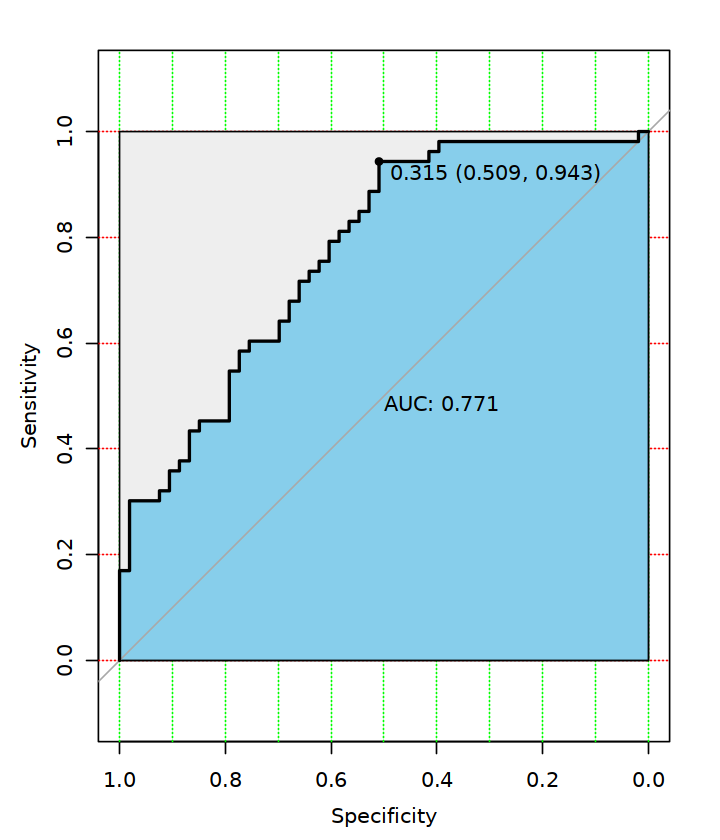

In [9]:
fold_pre <- glm(Group~.,data=data,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=data)

options(repr.plot.width = 6)
roc_curve <- pROC::roc(as.numeric(data$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [11]:
fold_pre <- glm(Group~.,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

In [12]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




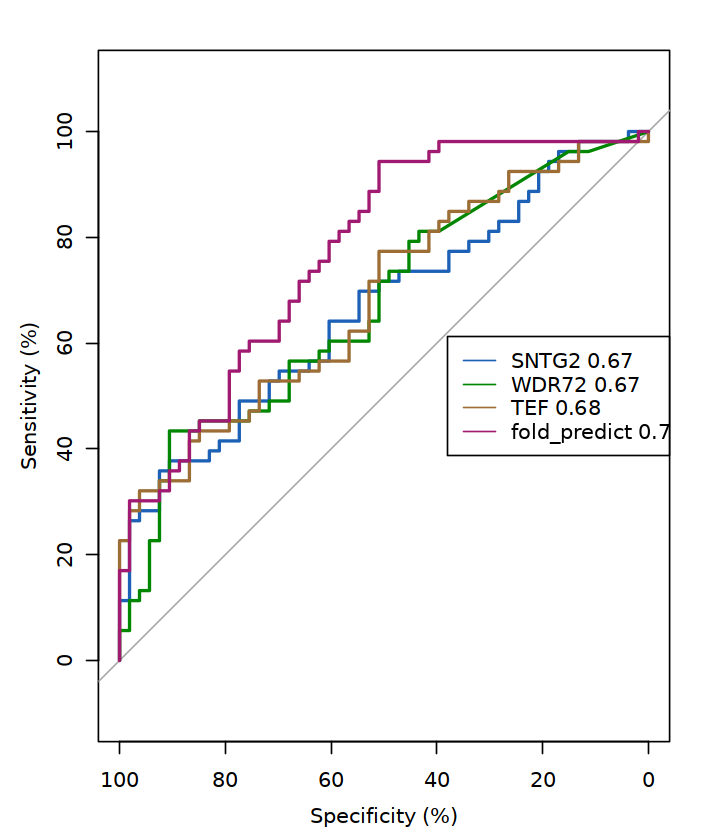

In [13]:
rocobj1 <- plot.roc(data$Group, data$SNTG2,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$WDR72,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$TEF,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")

rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")

legend("right", legend=c(paste0("SNTG2 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("WDR72 ", round(rocobj2$auc/100,digits = 2)),
                               paste0("TEF ", round(rocobj3$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70"), lwd=1)